In [3]:
import numpy as np
from astropy.coordinates import SkyCoord

In [4]:
import astropy.units as u

In [5]:
import matplotlib.pyplot as plt

In [4]:
detector_x = 40 * u.arcmin
detector_y = 40 * u.arcmin

In [5]:
survey_field_x = 10 * u.deg
survey_field_y = 10 * u.deg

In [56]:
# the finest level the grid is
# n is essentially the refinement level
# number of grid is 2^(n-1)
finest = 1
# overlap for dithering
overlap_frac = 0.85
overlap_x = overlap_frac * detector_x
overlap_y = overlap_frac * detector_y
shift_x = (detector_x - overlap_x) / 2**(finest-1)
shift_y = (detector_y - overlap_y) / 2**(finest-1)

In [57]:
side_x = int(np.ceil((survey_field_x / shift_x).decompose()))
side_y = int(np.ceil((survey_field_y / shift_y).decompose()))

In [58]:
(shift_x * side_x).to(u.deg)

<Quantity 10.1 deg>

In [59]:
adjusted_field_x = side_x * shift_x
adjusted_field_y = side_y * shift_y
# use symmetric padding, i.e. pad the same amount on both sides
padding_x = adjusted_field_x - survey_field_x
padding_y = adjusted_field_y - survey_field_y

In [60]:
xi, yi = np.meshgrid(np.linspace(-adjusted_field_x/2, adjusted_field_x/2, side_x + 1), 
            np.linspace(-adjusted_field_y/2, adjusted_field_y/2, side_y + 1))

In [61]:
adjusted_field_x.to(u.deg)

<Quantity 10.1 deg>

In [62]:
survey_field_x

<Quantity 10. deg>

In [63]:
# symmetric padding
xi -= padding_x/2
yi -= padding_y/2

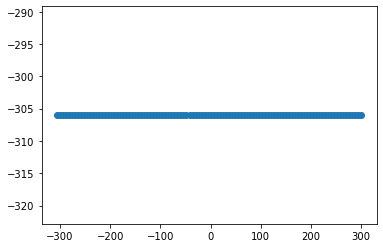

In [64]:
plt.plot(xi[0, :], yi[0, :], 'o')

In [65]:
# need to add the circular rejection
radius = 5*u.deg
# add a 5% 
in_circle = np.sqrt(xi**2 + yi**2) < radius*1.1

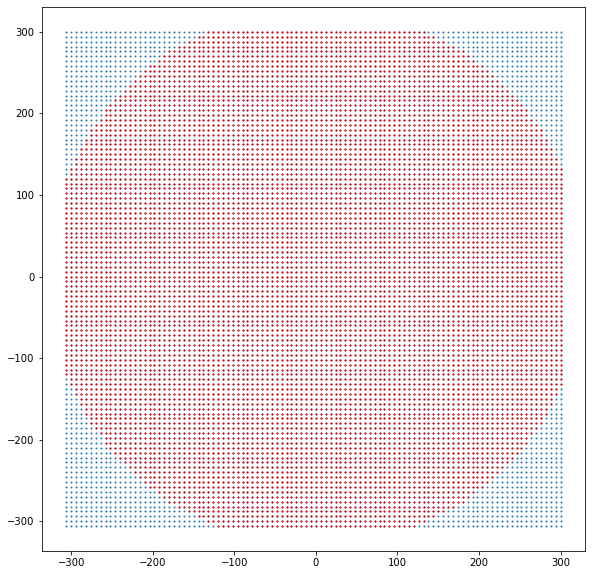

In [66]:
plt.figure(figsize=(10, 10))
plt.scatter(xi, yi, s=1)
plt.scatter(xi[in_circle], yi[in_circle], c='r', s=1)
plt.gca().set_aspect('equal')

In [52]:
center_x = 35.41 * u.deg
center_y=-4.85 * u.deg

In [53]:
ra = xi + center_x
dec = yi + center_y

In [54]:
ra.to(u.deg)

<Quantity [[30.21, 30.81, 31.41, 32.01, 32.61, 33.21, 33.81, 34.41, 35.01,
            35.61, 36.21, 36.81, 37.41, 38.01, 38.61, 39.21, 39.81, 40.41],
           [30.21, 30.81, 31.41, 32.01, 32.61, 33.21, 33.81, 34.41, 35.01,
            35.61, 36.21, 36.81, 37.41, 38.01, 38.61, 39.21, 39.81, 40.41],
           [30.21, 30.81, 31.41, 32.01, 32.61, 33.21, 33.81, 34.41, 35.01,
            35.61, 36.21, 36.81, 37.41, 38.01, 38.61, 39.21, 39.81, 40.41],
           [30.21, 30.81, 31.41, 32.01, 32.61, 33.21, 33.81, 34.41, 35.01,
            35.61, 36.21, 36.81, 37.41, 38.01, 38.61, 39.21, 39.81, 40.41],
           [30.21, 30.81, 31.41, 32.01, 32.61, 33.21, 33.81, 34.41, 35.01,
            35.61, 36.21, 36.81, 37.41, 38.01, 38.61, 39.21, 39.81, 40.41],
           [30.21, 30.81, 31.41, 32.01, 32.61, 33.21, 33.81, 34.41, 35.01,
            35.61, 36.21, 36.81, 37.41, 38.01, 38.61, 39.21, 39.81, 40.41],
           [30.21, 30.81, 31.41, 32.01, 32.61, 33.21, 33.81, 34.41, 35.01,
            35.61, 

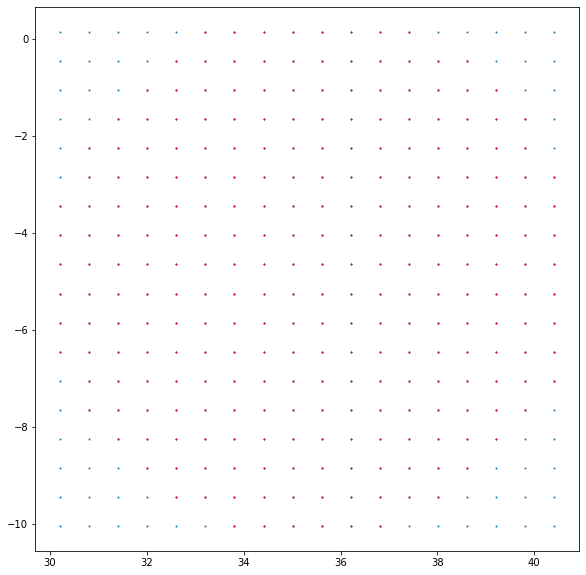

In [55]:
plt.figure(figsize=(10, 10))
plt.scatter(ra.to(u.deg), dec.to(u.deg), s=1)
plt.scatter(ra[in_circle].to(u.deg), dec[in_circle].to(u.deg), c='r', s=1)
plt.gca().set_aspect('equal')

In [79]:
def generate_dithering_path(field_FOV_x, field_FOV_y, detector_FOV_x, detector_FOV_y,
                            finest_level, overlap_frac, center_ra, center_dec, 
                            radius=None):
    # survey_field_x, survey_field_y = field_FOV_ra, field_FOV_dec
    # detector_FOV_x, detector_y = detector_FOV_ra, detector_FOV_dec
    # overlap for dithering
    overlap_x = overlap_frac * detector_FOV_x
    overlap_y = overlap_frac * detector_FOV_y
    # the finest level the grid is
    # n is essentially the refinement level
    # number of grid is 2^(n-1)
    shift_x = (detector_FOV_x - overlap_x) / 2**(finest_level-1)
    shift_y = (detector_FOV_y - overlap_y) / 2**(finest_level-1)
    num_shift_x = int(np.ceil((field_FOV_x / shift_x).decompose()))
    num_shift_y = int(np.ceil((field_FOV_y / shift_y).decompose()))
    # print(num_shift_x, num_shift_y)
    adjusted_field_x = num_shift_x * shift_x
    adjusted_field_y = num_shift_y * shift_y
    # use symmetric padding, i.e. pad the same amount on both sides
    padding_x = adjusted_field_x - field_FOV_x
    padding_y = adjusted_field_y - field_FOV_y
    xi, yi = np.meshgrid(np.linspace(-adjusted_field_x/2, adjusted_field_x/2, num_shift_x), 
                        np.linspace(-adjusted_field_y/2, adjusted_field_y/2, num_shift_y))
    # symmetric padding
    xi -= padding_x/2
    yi -= padding_y/2
    if radius:
        # need to add the circular rejection
        # add a 5% oversize to compensate the loss of image on the side
        in_circle = np.sqrt(xi**2 + yi**2) < radius*1.05
        xi = xi[in_circle]
        yi = yi[in_circle]
        # print(in_circle)
    ra = xi.ravel() + center_ra
    dec = yi.ravel() + center_dec
    return ra, dec

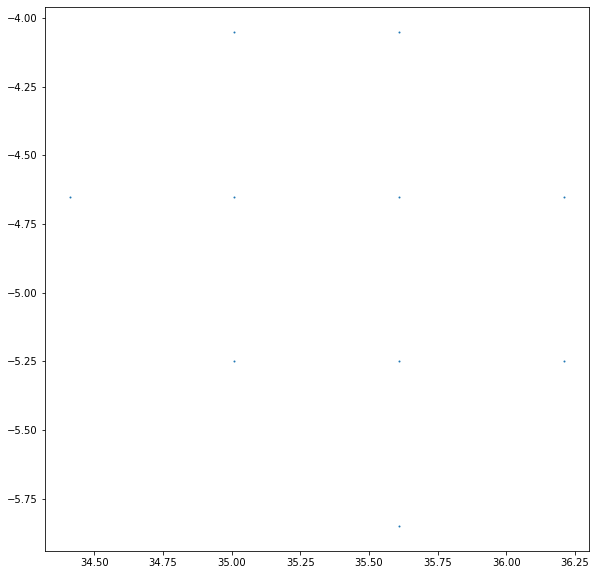

In [99]:
# ! NB this is a 15% dithering pattern
ra, dec = generate_dithering_path(10*u.deg, 10*u.deg, 40*u.arcmin, 40*u.arcmin, 
                                  1, 0.15, 35.41*u.deg, -4.85*u.deg, radius=1*u.deg)
plt.figure(figsize=(10, 10))
plt.scatter(ra.to(u.deg), dec.to(u.deg), s=1)
# plt.scatter(ra[in_circle].to(u.deg), dec[in_circle].to(u.deg), c='r', s=1)
plt.gca().set_aspect('equal')

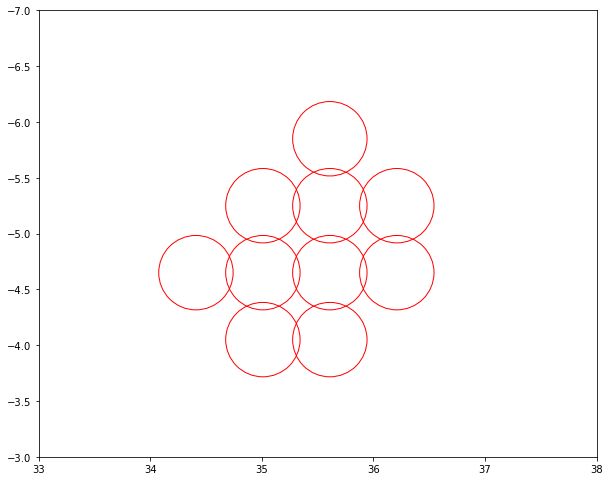

In [100]:
figure = plt.figure(figsize=(10, 10))
ax = figure.gca()
# plt.scatter(ra.to(u.deg), dec.to(u.deg), s=1)
# plt.scatter(ra[in_circle].to(u.deg), dec[in_circle].to(u.deg), c='r', s=1)
for i in range(len(ra)):
    # for j in range(len(dec)):
    circle = plt.Circle((ra.to(u.deg).value[i], dec.to(u.deg).value[i]), 40/60/2, fill=False, color='r')
    ax.add_patch(circle)
ax.set_aspect('equal')
plt.xlim([33, 38])
plt.ylim([-3, -7])
plt.savefig("0.15_percent_dithering.png")

In [ ]:
coord = SkyCoord(ra="320.03661926098", dec="
                 ", frame='icrs')